In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd




<ipython-input-1-28780715f43c>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [ ]:
column_to_predict = 'Current'
df = pd.read_csv('drive/MyDrive/nepse.csv')
nepse_data = df[df['Index'] == 'NEPSE Index']
df_sorted = nepse_data.sort_values(by='Date', ignore_index=True)

data = pd.to_numeric(df_sorted["Current"])
date = df_sorted["Date"]
date.tail(), data

(2031    2023-11-27
 2032    2023-11-28
 2033    2023-11-29
 2034    2023-11-30
 2035    2023-12-03
 Name: Date, dtype: object,
 0        904.00
 1        918.00
 2        920.00
 3        917.00
 4        925.00
          ...   
 2031    1896.67
 2032    1894.53
 2033    1876.60
 2034    1858.53
 2035    1851.23
 Name: Current, Length: 2036, dtype: float64)

In [ ]:
# split into train and test sets
# print(series[column_to_predict])
import numpy as np
X = data
size = int(len(X) * 0.66)
train, test = np.array(X[0:size]), np.array(X[size:len(X)])

In [ ]:
len(test), len(train)

(693, 1343)

In [ ]:
history = list(train)
predictions = list()


In [ ]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 34.885


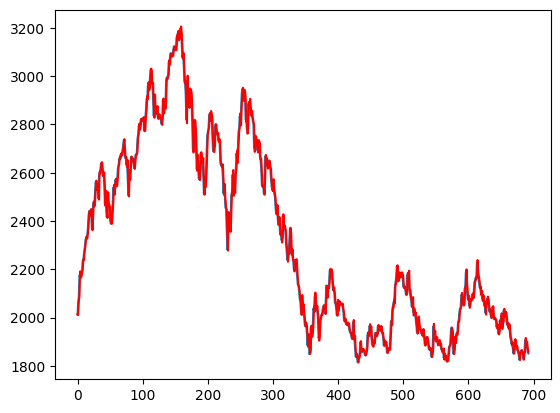

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

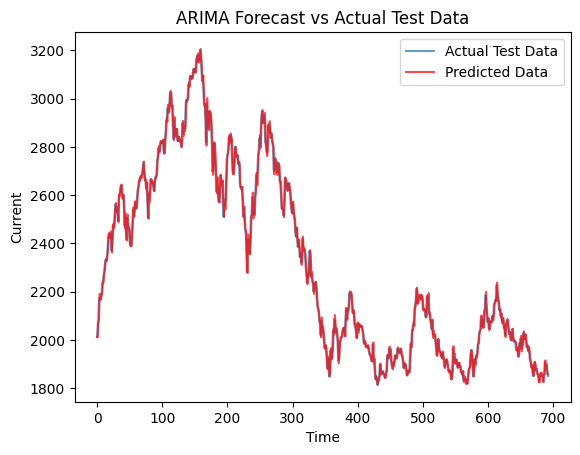

In [ ]:
# plot forecasts against actual outcomes with transparency
pyplot.plot(test, label='Actual Test Data', alpha=0.7)
pyplot.plot(predictions, color='red', label='Predicted Data', alpha=0.7)
pyplot.xlabel('Time')
pyplot.ylabel(column_to_predict)
pyplot.title('ARIMA Forecast vs Actual Test Data')
pyplot.legend()
pyplot.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
# train, test = train_test_split(data, train_size=80)

In [ ]:
# AutoARIMA
model = pm.auto_arima(train, suppress_warnings=True, seasonal=True, m=12)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1343
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5761.596
Date:                Thu, 21 Dec 2023   AIC                          11529.193
Time:                        04:16:06   BIC                          11544.799
Sample:                             0   HQIC                         11535.039
                               - 1343                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8260      0.571      1.447      0.148      -0.293       1.945
ma.L1          0.1774      0.012     14.302      0.000       0.153       0.202
sigma2       313.8112      5.559     56.456      0.0

In [ ]:
# Forecast future values
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

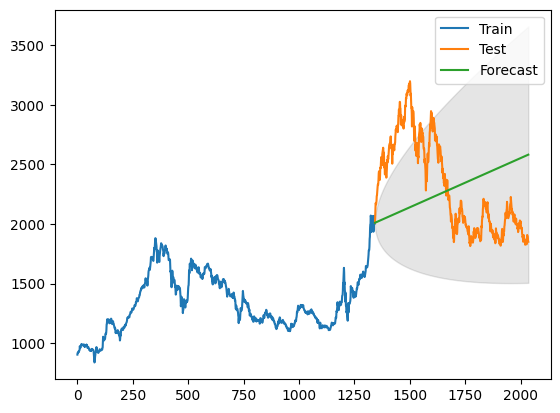

In [ ]:
# Plotting the results
pyplot.plot(train, label='Train')
pyplot.plot(range(len(train), len(train) + len(test)), test, label='Test')
pyplot.plot(range(len(train), len(train) + len(test)), forecast, label='Forecast')
pyplot.fill_between(range(len(train), len(train) + len(test)), conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)
pyplot.legend()
pyplot.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 273293.6759781106


In [ ]:
#lstm

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [ ]:
df_sorted.head()

,Date,Index,Current,Point Change,% Change,Turnover
0,2015-01-01,NEPSE Index,904.0,1.35,0.15,0.0
1,2015-01-04,NEPSE Index,918.0,13.82,1.53,0.0
2,2015-01-05,NEPSE Index,920.0,2.27,0.25,0.0
3,2015-01-06,NEPSE Index,917.0,-2.36,-0.26,0.0
4,2015-01-07,NEPSE Index,925.0,7.13,0.78,0.0


In [ ]:
print("Dataframe Shape: ", df_sorted.shape)
print("Null Value Present: ", df_sorted.isnull().values.any())

Dataframe Shape:  (2036, 6)
Null Value Present:  False


<Axes: >

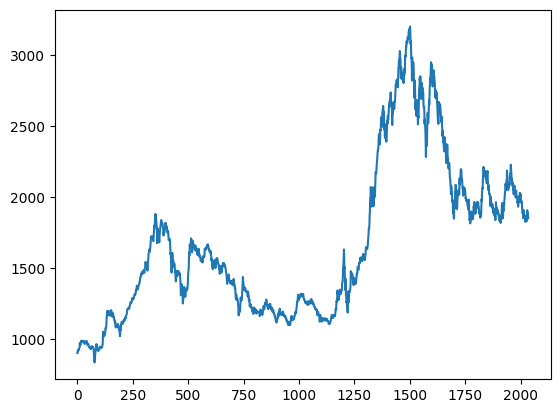

In [ ]:
data.plot()

In [ ]:
print(data)

0        904.00
1        918.00
2        920.00
3        917.00
4        925.00
         ...   
2031    1896.67
2032    1894.53
2033    1876.60
2034    1858.53
2035    1851.23
Name: Current, Length: 2036, dtype: float64


In [ ]:
#Set Target Variable
output_var = data
#Selecting the Features
features = ['Point Change', '% Change']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_sorted[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_sorted.index)
feature_transform.head()

,Point Change,% Change
0,0.437079,0.511570
1,0.480791,0.625620
2,0.440304,0.519835
3,0.424075,0.477686
4,0.457340,0.563636


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

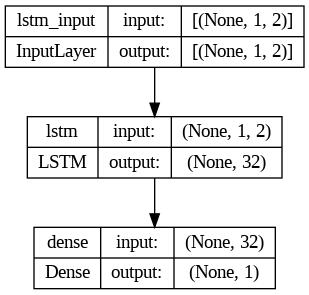

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 2s 2ms/step - loss: 3013831.5000
Epoch 2/100
232/232 [==============================] - 0s 2ms/step - loss: 2997618.0000
Epoch 3/100
232/232 [==============================] - 1s 2ms/step - loss: 2956515.0000
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 2893074.5000
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 2814089.5000
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 2724201.5000
Epoch 7/100
232/232 [==============================] - 1s 5ms/step - loss: 2626227.2500
Epoch 8/100
232/232 [==============================] - 1s 5ms/step - loss: 2522078.2500
Epoch 9/100
232/232 [==============================] - 1s 6ms/step - loss: 2413231.2500
Epoch 10/100
232/232 [==============================] - 1s 3ms/step - loss: 2300935.0000
Epoch 11/100
232/232 [==============================] - 1s 4ms/step - loss: 2186297.5000
Epoch 12/100
232/232 [========

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 2ms/step


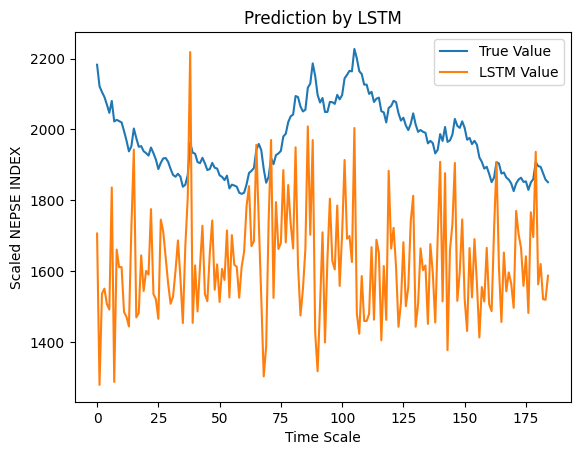

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled NEPSE INDEX')
plt.legend()
plt.show()